In [27]:
import numpy as np
from load import load_data
from convert import convert
from pmc import *


In [28]:
#%matplotlib widget
%matplotlib inline
#%matplotlib qt
#%matplotlib gtk

import matplotlib.pyplot as plt
import matplotlib.font_manager

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.rcParams.update({
    'pgf.rcfonts': False,
})

plt.rcParams['font.family'] = 'serif'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

# Input

- bpC : CT Compression data Break Point in p-q plane 
- bpE : CT Extension data Break Point in p-q plane

In [29]:
bpC = 70 #CT Compression data Break Point in p-q plane
bpE = 150 #CT Extension data Break Point in p-q plane 

In [30]:
data = load_data(10)
d = convert(data)
P1, P2 = create_P1_and_P2(d,bpC,bpE)

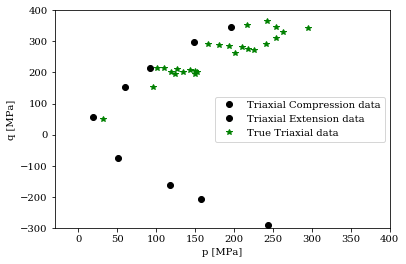

In [12]:
plt.plot(d['pC'],d['qC'],'ko',label ='Triaxial Compression data')

if d['pE'].size != 0:
    plt.plot(d['pE'],-1*d['qE'],'ko', label='Triaxial Extension data')
if d['po'].size != 0:
    plt.plot(d['po'],d['qo'],'g*', label='True Triaxial data')
plt.legend()

plt.xlabel('p [MPa]')
plt.ylabel('q [MPa]')
plt.xlim([-30, 400]);
plt.ylim([-300, 400]);
plt.savefig('t4.pdf')
plt.show()

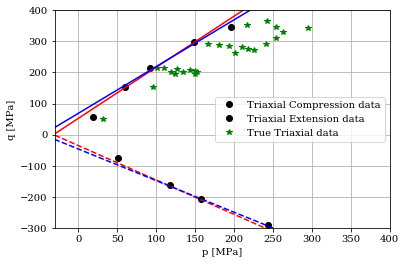

In [13]:
plt.clf()
plt.plot(d['pC'],d['qC'],'ko',label ='Triaxial Compression data')
if d['pE'].size != 0:
    plt.plot(d['pE'],-1*d['qE'],'ko', label='Triaxial Extension data')
if d['po'].size != 0:
    plt.plot(d['po'],d['qo'],'g*', label='True Triaxial data')
    
xfitP2 = np.linspace(-30,300) ;
xfitP1 = np.linspace(-40,400) ;

plt.plot(xfitP2,qCfit(P2,xfitP2),'r') ;
plt.plot(xfitP2,qEfit(P2,xfitP2),'--r') ;
plt.plot(xfitP1,qCfit(P1,xfitP1),'b') ;
plt.plot(xfitP1,qEfit(P1,xfitP1),'--b') ;

plt.xlim([-30, 400]);
plt.ylim([-300, 400]);
plt.grid()
plt.xlabel('p [MPa]')
plt.ylabel('q [MPa]')

plt.legend()

plt.savefig('t44.pgf')
#plt.savefig('t44.pdf')
plt.show()

In [14]:
x = np.linspace(0,max(d['sig2'])+100)
y = np.linspace(0,max(d['sig1'])+100)

In [15]:
def yc(P,x):
    return (P['Vo']/P['Nc'])+((P['Nc']+1)/P['Nc'])*x

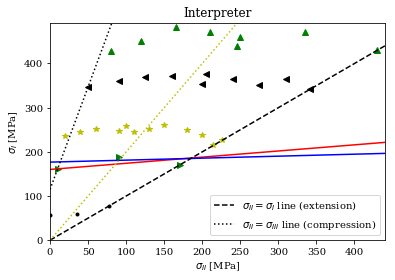

In [16]:
plt.clf()

markers = ['.','>','*','<','^','1']
colors = ['k','g','y',]
for (s1,s2,s3) in zip(d['sig1'],d['sig2'],d['sig3']):
    mark_idx = np.where(d['conf']==s3)[0][0]%len(markers)
    plt.plot(s2,s1,marker=markers[mark_idx],color=colors[mark_idx%len(colors)])

plt.plot(x,sig1(P2,x,d['conf'][1]),'r')
plt.plot(x,sig1(P1,x,d['conf'][1]),'b')
plt.plot(x,x,'--k',label='$\sigma_{II}=\sigma_{I}$ line (extension)')
plt.plot(x,yc(P2,x),'k:', label='$\sigma_{II}=\sigma_{III}$ line (compression)')
plt.plot(x,2*x,'y:')
plt.legend()

plt.xlim([0, max(d['sig2'])+10]);
plt.ylim([0, max(d['sig1'])+10]);
plt.xlabel('$\sigma_{II}$ [MPa]')
plt.ylabel('$\sigma_I$ [MPa]')
plt.title('Interpreter')
plt.show()

# 3D plotting

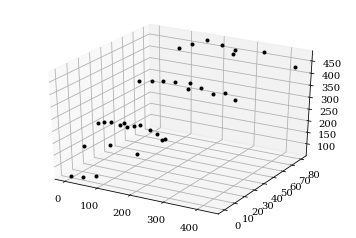

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(d['sig2'],d['sig3'],d['sig1'],'k.')

In [22]:
print('P1 P2\n{} {}\n{}{}'.format(P1['phyC'],P2['phyC'],P1['phyE'],P2['phyE']))

P1 P2
0.6455145323341879 0.7014256916752881
0.65930811892004860.7461720462517345


In [23]:
eq_pts_transisiton_P12 = np.zeros((6,3,3))

for i in range(6):
    eq_pts_transisiton_P12[i] = np.array([get_plane_n(P1,i),get_plane_n(P1,i-1),get_plane_n(P2,i)])

ones = np.ones((6,3))

pts_transisiton_P12 = np.linalg.solve(eq_pts_transisiton_P12, ones).transpose()

In [24]:
eq_pts_P2 = np.array([get_plane_n(P2,0),get_plane_n(P2,1),get_plane_n(P2,2)])
pts_P2 = np.linalg.solve(eq_pts_P2,np.ones((3,1)))

In [25]:
ax.plot(*pts_transisiton_P12,alpha=0)
ax.plot(*pts_P2,'b.',alpha=0)

In [31]:
sig_pts = np.array([d['sig2'],d['sig3'],d['sig1']])
all_pts = np.concatenate((sig_pts,pts_transisiton_P12,pts_P2),axis=1) #miss pts_P2
pts_with_largest_coord = all_pts[:,np.argmax(np.max(all_pts, axis=0))]

far_plane_n = np.ones(3)/np.sqrt(3)
far_plane_o = far_plane_n*(np.dot(far_plane_n,pts_with_largest_coord)*1.5)

In [32]:
np.dot(far_plane_n,far_plane_o)

629.7736736320439

In [33]:
eq_pts_P1_far = np.zeros((6,3,3))

b_far = np.array([[1,1,np.dot(far_plane_n,far_plane_o)]])

for i in range(6):
    eq_pts_P1_far[i] = np.array([get_plane_n(P1,i),get_plane_n(P1,i-1),far_plane_n])
    
pts_P1_far = np.linalg.solve(eq_pts_P1_far,b_far).transpose()

In [34]:
ax.plot(*pts_P1_far,alpha=0)

In [35]:
def get_verts(coord):
    return [list(zip(*cord))]

## Draw P2 planes

In [36]:
for i in range(6):
    cord = np.zeros((3,3))
    cord[:,0] = pts_P2[:,0]
    cord[:,1] = pts_transisiton_P12[:,i]
    cord[:,2] = pts_transisiton_P12[:,(i+1)%6]
    
    verts = get_verts(cord)
    poly = Poly3DCollection(verts,linewidths=1, alpha=0.5)
    poly.set_facecolor('r')
    ax.add_collection3d(poly)

## Draw P1 planes

In [37]:
for i in range(6):
    cord = np.zeros((3,4))
    cord[:,0] = pts_transisiton_P12[:,i]
    cord[:,1] = pts_transisiton_P12[:,(i+1)%6]
    cord[:,2] = pts_P1_far[:,(i+1)%6]
    cord[:,3] = pts_P1_far[:,i%6]
    
    verts = get_verts(cord)
    poly = Poly3DCollection(verts,linewidths=1, alpha=0.5)
    poly.set_facecolor('b')
    ax.add_collection3d(poly)

In [52]:
fig.show()
fig.savefig('3D.pdf')

# 2D view

In [39]:
new_base = np.zeros((3,3))

new_z = np.array([1,1,1])
new_y = np.array([-1,-1,2])
new_x = np.array([-1,1,0])
new_base[:,0] = new_x /np.linalg.norm(new_x )
new_base[:,1] = new_y /np.linalg.norm(new_y )
new_base[:,2] = new_z /np.linalg.norm(new_z )

In [40]:
new_base_transform = np.linalg.inv(new_base)
new_sig_pts = new_base_transform @ sig_pts
new_P12 = new_base_transform @ pts_transisiton_P12
new_P2 = new_base_transform @ pts_P2
new_far_P1 = new_base_transform @ pts_P1_far

In [41]:
plt.close()
#plt.axis('equal')
plt.plot(new_sig_pts[0,:],new_sig_pts[1,:],'k.')
plt.plot(new_P2[0,:],new_P2[1,:],'r.')
plt.fill(new_P12[0,:],new_P12[1,:],edgecolor='r',fill=False)
plt.fill(new_far_P1[0,:],new_far_P1[1,:],edgecolor='b',fill=False)

In [42]:
x = np.linspace(-800,800)
zer = [0]*len(x)
v = np.array([x,x,zer])
w = new_base_transform@v
plt.plot(w[0,:],w[1,:],'k-')
v = np.array([x,zer,x])
w = new_base_transform@v
plt.plot(w[0,:],w[1,:],'k-')
v = np.array([zer,x,x])
w = new_base_transform@v
plt.plot(w[0,:],w[1,:],'k-')

In [43]:
plt.show()

In [44]:
new_P12[:,:3]

array([[-7.84872467e-15, -1.21591652e+02, -1.72137355e+02],
       [ 1.98767096e+02,  7.02009733e+01, -9.93835480e+01],
       [ 2.01602595e+02,  2.14187933e+02,  2.01602595e+02]])

In [45]:
x = np.linspace(-400,400)
v = np.array([x,x,[0]*len(x)])

In [46]:
w = new_base_transform@v
w.shape

(3, 50)

In [47]:
pts_transisiton_P12[:,]

array([[ 35.24898557, 180.98031531, 278.68796708, 180.98031531,
         35.24898557,   9.02375132],
       [ 35.24898557,   9.02375132,  35.24898557, 180.98031531,
        278.68796708, 180.98031531],
       [278.68796708, 180.98031531,  35.24898557,   9.02375132,
         35.24898557, 180.98031531]])

In [48]:
P1['phyC'],P2['phyC']

(0.6455145323341879, 0.7014256916752881)

In [49]:
for phyCP in (P1['phyC'],P2['phyC']):
    w = (6*sin(phyCP)/(3-sin(phyCP)))
    print(w)

1.5050331303337248
1.6443101186636035


In [50]:
plt.close()
x = np.linspace(0,np.pi/2)
plt.plot(x,(6*sin(x)/(3-sin(x))))
plt.plot(x,-(6*sin(x)/(3+sin(x))))
plt.show()

In [26]:
print('P1 P2\n{} {}\n{}{}'.format(P1['phyC'],P2['phyC'],P1['phyE'],P2['phyE']))

P1 P2
0.6455145323341879 0.7014256916752881
0.65930811892004860.7461720462517345
